# Introduction to Data Science (First machine learning model)
<b>By: <em>David Serna</em></b><br>
<b><em>Data Scientist and Data Engineer</em></b>

Welcome!<br>
This is a remake of the project: https://github.com/dsernag/Data_Science_Acamica<br>
We have a sample dataset from [Properati](www.properati.com.ar) a real estate company in Argentina.
Long story short we will make an EDA and then train a couple machine learning models to predict the price of the properties and make some conclusions.

Here is my LinkedIn profile: [<img width="25px" src="..\docs\imgs\linkedIn_PNG32.png" alt="LinkedinLogo">](https://www.linkedin.com/in/dsernag/)

This is open source code, so you can use it, but remember to be etic and if is possibly, cite it.

## Configure your environment

I highly recommend to create an isolated Python environment, for sanity check, replication purposes and as a learning activity.
### Conda environment

I love [miniconda](https://docs.conda.io/en/latest/miniconda.html), is light and portable and allow an easly manipulation of environments. If you don't install conda, please at least create an independt environment in Python, here is the [documentation](https://docs.python.org/3/library/venv.html).

After install miniconda, create a environment this way (This command is valid for any operating system):

```bash
conda create -n acamica python=3.9 ipykernel pandas numpy matplotlib seaborn scikit-learn -y
```

There is also a `requirements.txt` file to install via pip


Now we are ready to begin!🚀🚀🚀

<b>NOTE:</b> This notebook is not intended no be used in a row. Is intended to be executed line by line, with supervision and understanding the process.


## Exploratory Data Analysis

### Import libraries and first glimpse

In [1]:
# Import libraries and red the data base
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

properati_raw = pd.read_csv('../data/properati.csv', encoding = "utf-8")

Let's check what is the size of the dataset and have a first view of the content:

In [2]:
print(f"The datasets has {properati_raw.shape[0]} records and {properati_raw.shape[1]} features\n")
properati_raw.head()

The datasets has 146660 records and 19 features



,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


### Check null values

Let's create a function to iterate over each column and check how many null values there are.

In [3]:
COLUMNS = properati_raw.columns
def print_null_values(df):
    for column in COLUMNS:
        if properati_raw[column].isnull().any() == True:
            print(f"The column {[column]} has {properati_raw[column].isnull().sum()} null values")

print_null_values(properati_raw)

The column ['lat'] has 9925 null values
The column ['lon'] has 9959 null values
The column ['bathrooms'] has 5957 null values
The column ['surface_total'] has 20527 null values
The column ['surface_covered'] has 21614 null values


### Remove null values

Because this is our first project, and we are making a simple EDA, we don't going to fill the empty values. So, for now, let's remove them

In [4]:
properati_no_NA = properati_raw.dropna(axis = 0)

properati_raw_shape = properati_raw.shape[0]
properati_no_NA_shape = properati_no_NA.shape[0]
rows_deleted = properati_raw_shape-properati_no_NA_shape
print(f'Was deleted a total of {rows_deleted} records from {properati_raw_shape}. This represents {(rows_deleted*100)/properati_raw_shape:.2f}% of the data')

Was deleted a total of 32172 records from 146660. This represents 21.94% of the data


### Types of property

Let's give a glimp on how many property types are

In [5]:
def print_unique_values(df, column):
    category_column = df[column]
    summary_category_column = category_column.value_counts()

    print(f"There are {len(category_column.unique())} types of '{column}'. This is the distribution:\n{summary_category_column}")
print_unique_values(properati_no_NA, 'property_type')

There are 10 types of 'property_type'. This is the distribution:
Departamento       85071
Casa               15162
PH                 13530
Oficina              336
Casa de campo        240
Otro                  98
Lote                  29
Local comercial       15
Depósito               5
Cochera                2
Name: property_type, dtype: int64


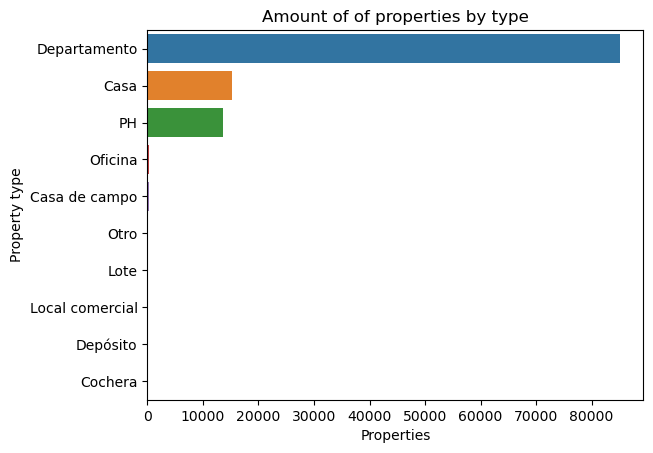

In [6]:
sns.countplot(data = properati_no_NA, y = "property_type", order = properati_no_NA['property_type'].value_counts().index)
plt.title('Amount of of properties by type')
plt.ylabel('Property type')
plt.xlabel('Properties')
plt.show()

### Types of provinces and cities

Explore these two variables `l2` are the provinces and `l3` the cities.

#### Provinces

In [7]:
print_unique_values(properati_no_NA, 'l2')

There are 4 types of 'l2'. This is the distribution:
Capital Federal             77338
Bs.As. G.B.A. Zona Norte    18582
Bs.As. G.B.A. Zona Sur      10477
Bs.As. G.B.A. Zona Oeste     8091
Name: l2, dtype: int64


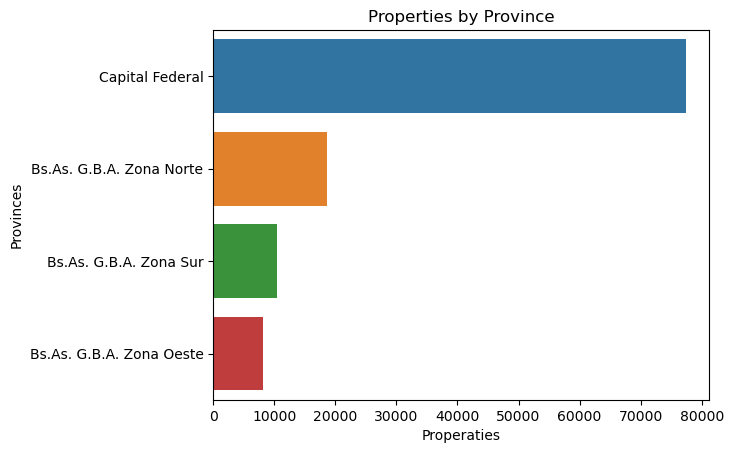

In [8]:
sns.countplot(y =properati_no_NA['l2'], order = properati_no_NA['l2'].value_counts().index)
plt.title('Properties by Province')
plt.ylabel('Provinces')
plt.xlabel('Properaties')
plt.show()

#### Cities

In [9]:
print_unique_values(properati_no_NA, 'l3')

There are 89 types of 'l3'. This is the distribution:
Palermo             11211
Almagro              6655
Tigre                6069
Villa Crespo         5835
Caballito            5562
                    ...  
Presidente Perón       67
Villa Soldati          65
Villa Riachuelo        33
Marcos Paz             21
Catalinas               5
Name: l3, Length: 89, dtype: int64


We're not going to plot this variable, beacuse has too many categories.

### Filter the Dataset

Now lets filter the dataframe. We have some interesting insights. Acámica recommend to filter following these criterias:

* `property_type` must be "Departamento", "PH" or "Casa
* `l2` equals to "Capital Federal

Let's do it:

In [10]:
properati_new = properati_no_NA.loc[
    ((properati_no_NA['property_type'] == 'Departamento') |
    (properati_no_NA['property_type'] == 'PH') | 
    (properati_no_NA['property_type'] == 'Casa'))
    & 
    (properati_no_NA['l2'] == 'Capital Federal')]

print(properati_new.shape)
print(properati_no_NA.shape)

(76961, 19)
(114488, 19)


### Final inspection, fix inconsistencies and check outliers

#### Limit features

Before we continue, let's trim the dataset a little bit more.
First, select the recommended columns by Acámica:

In [11]:
recommended_columns = ['rooms','bedrooms','bathrooms','surface_total','surface_covered', 'price']
properati_new = properati_new[recommended_columns]

Now we can get a summary of the variables:

In [12]:
properati_new.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,76961.000000,76961.000000,76961.000000,76961.000000,76961.000000,7.696100e+04
mean,3.005223,1.998857,1.538610,113.103000,95.086940,2.587050e+05
std,1.306747,1.051604,0.838084,1015.102403,804.084792,3.248616e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.240000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.780000e+05
75%,4.000000,3.000000,2.000000,110.000000,95.000000,2.780000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


There are some particular notes to make about what we found:

* [rooms]: There are properties with 26 rooms, whichs seems unusual with a mean of 3.

* [bedrooms]: Like rooms, 15 bedrooms looks weird, also properties without bedrooms could raise suspicion.

* [bathrooms]: A max of 14 bathrooms could be a mistake

* [surface_total] & [surface_covered]: From Acámica we know some publications where the `surface_covered` is greater thatn the `surface_total`. We address that later.


#### Covered surface and total surface

There is an inconsistency between these two variables. They are really tight, but the covered surface cannot be greater than total surface. Let's check how many inconsistencies are:

In [13]:
condition = properati_new['surface_covered'] > properati_new['surface_total']
properati_new[condition].iloc[:,3:5]

,surface_total,surface_covered
446,230.0,244.0
859,43.0,44.0
924,65.0,66.0
1329,44.0,45.0
1438,78.0,79.0
...,...,...
145138,24.0,25.0
145146,21.0,22.0
145262,51.0,52.0
145376,197.0,290.0


Wow! almost thousand! That's a lot. We can use the function `np.where` to replace those values `surface_covered` by `surface_total` 

In [14]:
surface_covered = np.where(condition, properati_new['surface_total'], properati_new['surface_covered'])
properati_new['surface_covered'] = surface_covered

Now, if we run the previous commands, sould return any match 😁

In [15]:
condition = properati_new['surface_covered'] > properati_new['surface_total']
properati_new[condition].iloc[:,3:5]

,surface_total,surface_covered


#### Explore outliers

I already made this in the past version. However this time I want to make something different. I will create a funtion to plot every boxplot of the 6 variables: 3 rows, 2 columns!

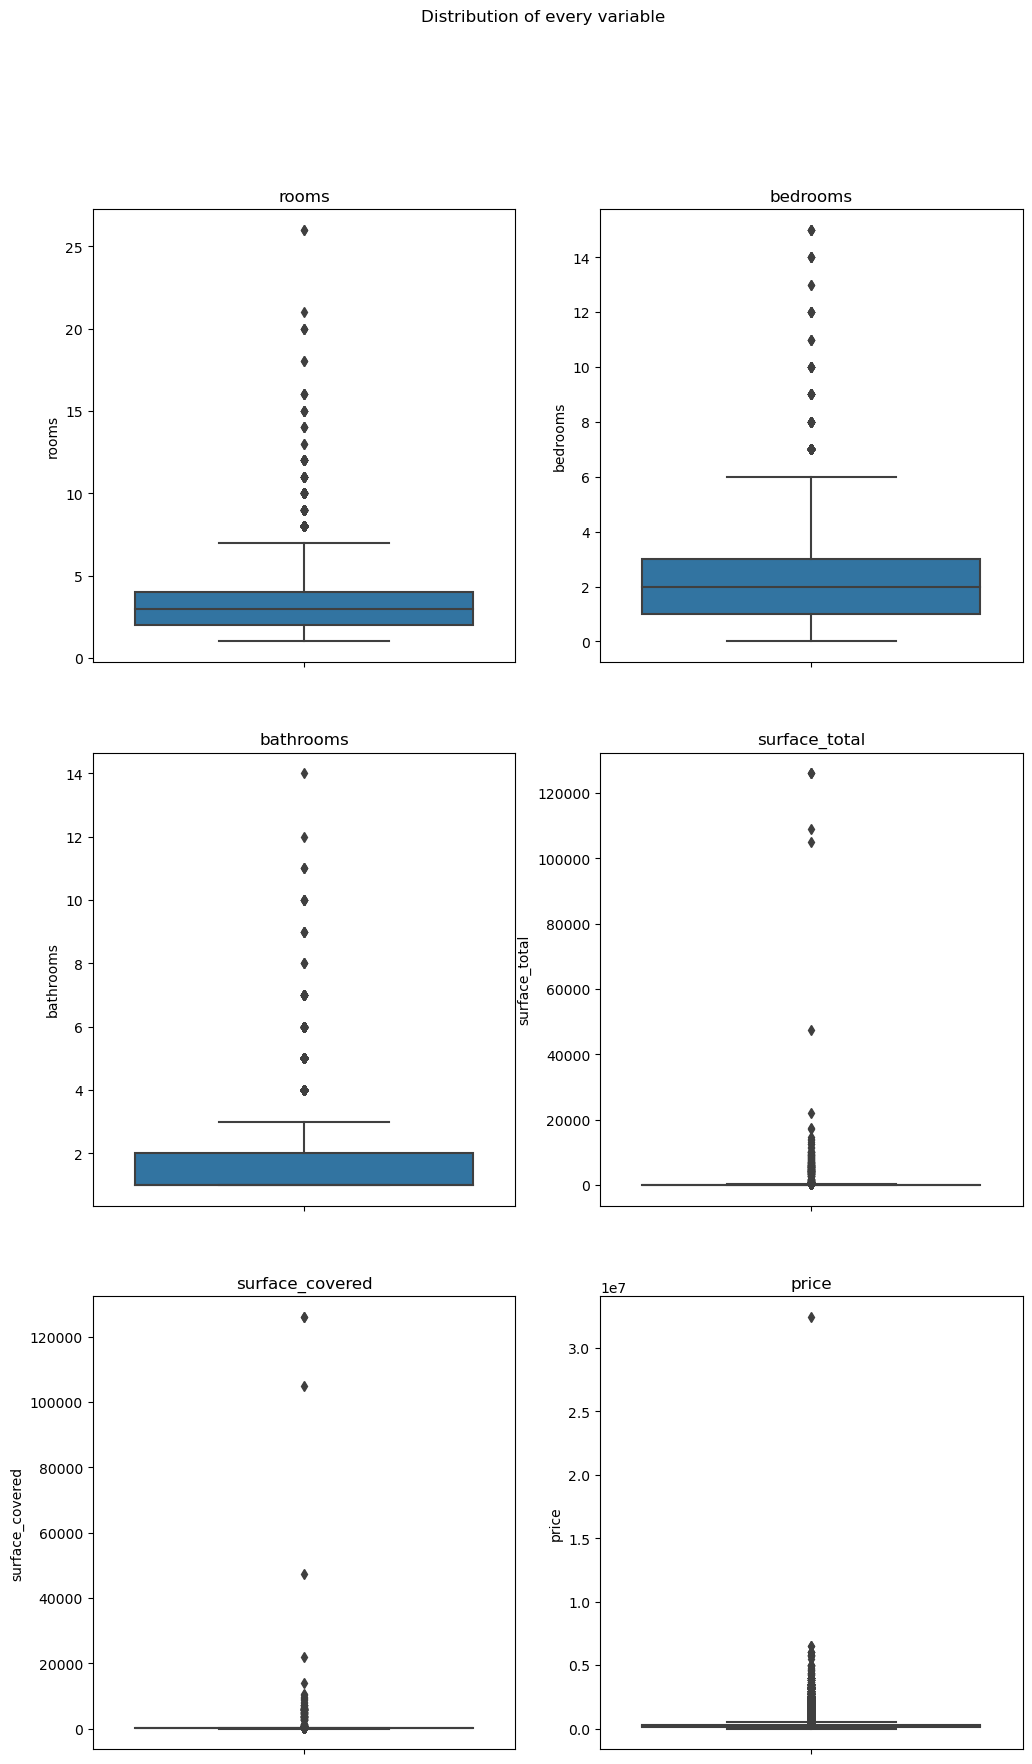

In [16]:
def plot_boxplots(df):
    fig, axs = plt.subplots(3, 2, figsize = (12, 20))
    fig.suptitle("Distribution of every variable")
    counter = 0 # To get the index in the list of features
    for row in range(0,3):
        for column in range(0,2):
            column_name = recommended_columns[counter]
            # Plot process:
            sns.boxplot(ax = axs[row, column], data = properati_new, y = column_name)
            axs[row, column].set_title(column_name)
            counter += 1
    plt.show()
plot_boxplots(properati_new)

Great! From the previous version y chop the top 5% quantile of `surface_total`. However I consider wise choice trim 10% top of `price` to reduce the variance:

In [17]:
ml_properati = properati_new[(properati_new['price'] < properati_new['price'].quantile(0.90)) & (properati_new['price'] > properati_new['price'].quantile(0.01))]
droped_rows = properati_new.shape[0] - ml_properati.shape[0]
print(f"Where deleted {droped_rows} values a {droped_rows*100/properati_new.shape[0]:.2f}% of the data")
print(f'The initial std for price was: {np.std(properati_new.price):.2f}\n\
After droping the top 5% the std is: {np.std(ml_properati.price):.2f}')

Where deleted 8724 values a 11.34% of the data
The initial std for price was: 324859.50
After droping the top 5% the std is: 87701.78


## Machine Learning

Cool!😎

Thanks for being with me so far. Now let's make some machine learning models! Please continue developing this notebook with me:

### ML Libraries and train test set

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

Let's separate the X variables and Y

In [19]:
X = ml_properati.drop('price',axis=1)
y = ml_properati.price

Use the `train_test_split` function from scikit-learn:

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=267)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(47765, 5) (47765,) (20472, 5) (20472,)


### Generalized functions to efficient ML

Because this is a remake, I'm doing my best by applying the DRY concept (Don't Repeat Yourself). I know in advance that we are going to train different models, and must be evaluated, so let's create a function that can instatiate any ML Model and a function to graph the errors:

In [21]:
def train_model(xtrain, xtest, ytrain, ytest, Model):
    model = Model
    model.fit(xtrain, ytrain)
    y_train_pred = model.predict(xtrain)
    y_test_pred = model.predict(xtest)
    rmse_train = np.sqrt(mean_squared_error(ytrain, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(ytest, y_test_pred))
    return y_train_pred, y_test_pred, rmse_train, rmse_test

In [22]:
def plot_errors(rmse_train,rmse_test,y_train_pred,y_test_pred):
    print(f'RMSE in Train: {rmse_train}')
    print(f'RMSE in Test: {rmse_test}')

    plt.figure(figsize = (10,5))
    
    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 50, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 50, label = 'test')
    plt.xlabel('errors')
    plt.legend()
    
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

### Linear Model (Benchmark)

In [23]:
y_train_pred_lin, y_test_pred_lin, rmse_train_lin, rmse_test_lin = train_model(X_train, X_test, y_train, y_test, LinearRegression())

RMSE in Train: 64127.65190123718
RMSE in Test: 63838.5166800019


C:\Users\daseg\AppData\Local\Temp\ipykernel_13832\3248276874.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train_pred, bins = 50, label = 'train')
C:\Users\daseg\AppData\Local\Temp\ipykernel_13832\3248276874.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_test_pr

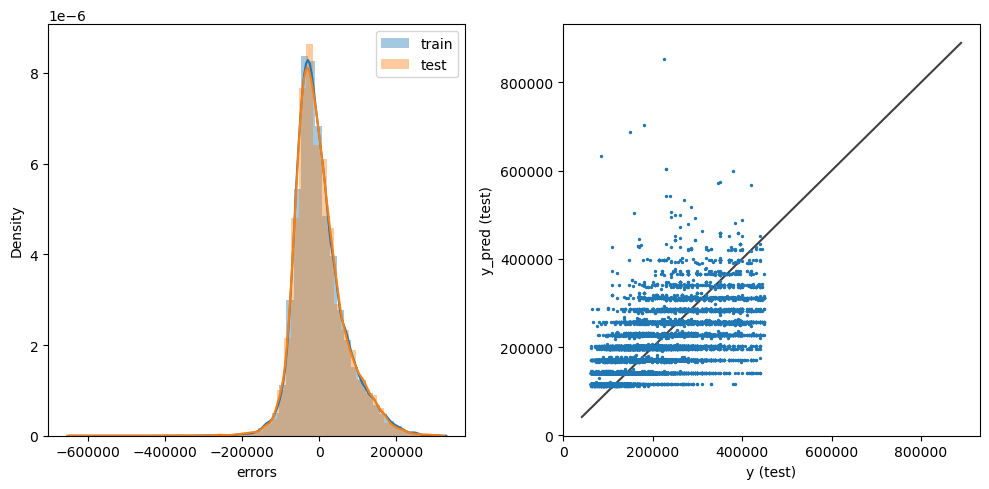

In [24]:
plot_errors(rmse_train_lin,rmse_test_lin,y_train_pred_lin,y_test_pred_lin)

### KNN

KNN has a parameter `n_neighbors`. To develop a proper model we should iterate over a range of neighbors and verify in a graph where is the plateu of RMSE

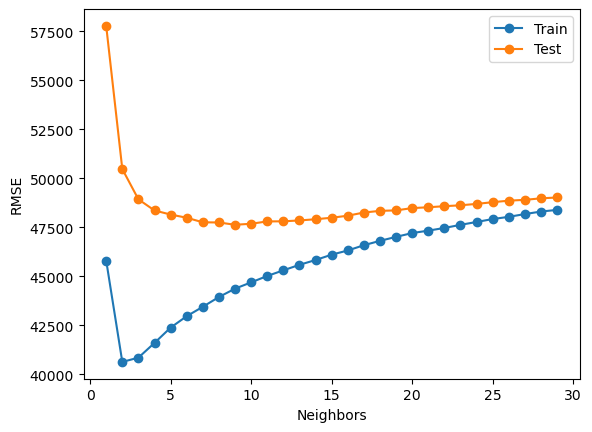

For train data the lowest RMSE was: 40626.758 with 2 neighbors
For test data the lowest RMSE was: 47629.817 with 9 neighbors


In [25]:
def evaluate_neighbors():
    neighbors = list(np.arange(1,30))
    rmse_train_lst = []
    rmse_test_lst = []

    for i in neighbors:
        _, _, rmse_train, rmse_test = train_model(X_train, X_test, y_train, y_test, KNeighborsRegressor(i))    
        rmse_train_lst.append(rmse_train)
        rmse_test_lst.append(rmse_test)

    plt.plot(neighbors, rmse_train_lst, 'o-', label='Train')
    plt.plot(neighbors, rmse_test_lst, 'o-', label='Test')
    plt.legend()
    plt.xlabel('Neighbors')
    plt.ylabel('RMSE')
    plt.show()

    # Check the small value of RMSE in the list
    min_train = rmse_train_lst == np.min(rmse_train_lst)
    min_test = rmse_test_lst == np.min(rmse_test_lst)

    # Obtain the ammount of neighbors:
    n_train = np.where(min_train)[0][0] + 1
    n_test = np.where(min_test)[0][0] + 1

    print(f"For train data the lowest RMSE was: {np.min(rmse_train_lst):.3f} with {n_train} neighbors")
    print(f"For test data the lowest RMSE was: {np.min(rmse_test_lst):.3f} with {n_test} neighbors")
evaluate_neighbors()

Now let's run the model with the best params for test:

In [26]:
y_train_pred_knn, y_test_pred_knn, rmse_train_knn, rmse_test_knn = train_model(X_train, X_test, y_train, y_test, KNeighborsRegressor(9))

RMSE in Train: 44368.028048132284
RMSE in Test: 47629.81730667672


C:\Users\daseg\AppData\Local\Temp\ipykernel_13832\3248276874.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train_pred, bins = 50, label = 'train')
C:\Users\daseg\AppData\Local\Temp\ipykernel_13832\3248276874.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_test_pr

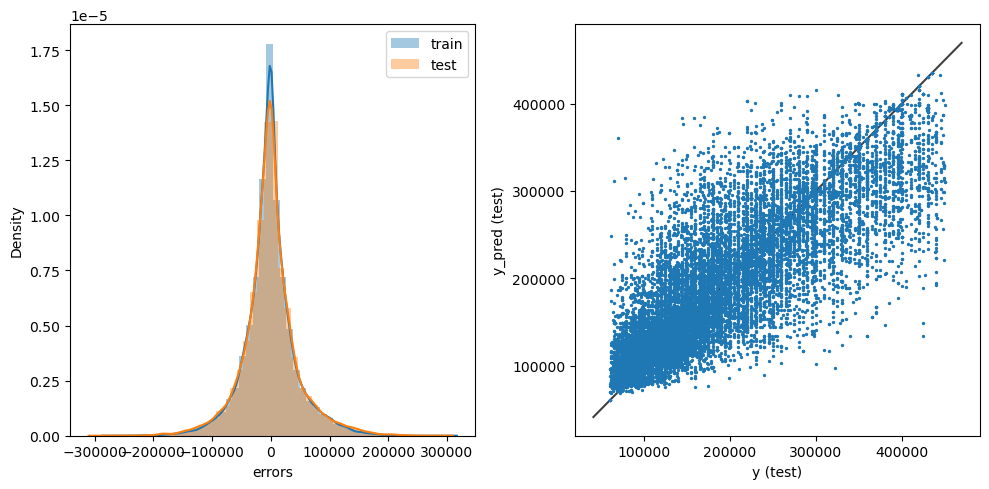

In [27]:
plot_errors(rmse_train_knn, rmse_test_knn, y_train_pred_knn, y_test_pred_knn)

#### Decision Tree

The decision trees like KNN have different parameters. Let's recreate a similar function to at what depth we obtain the plateu

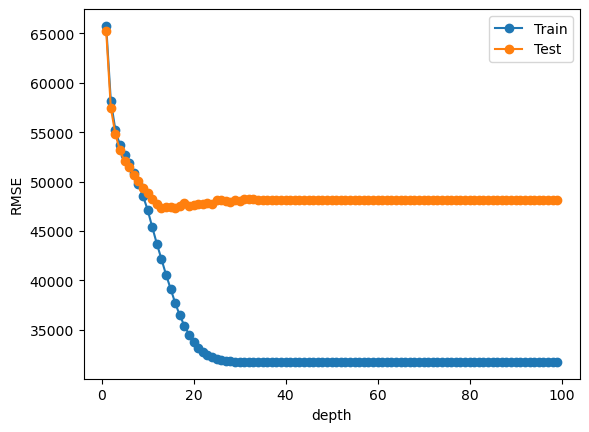

For train data the lowest RMSE was: 31760.306 with 36 depth
For test data the lowest RMSE was: 47336.914 with 13 depth


In [28]:
def evaluate_dtr():
    depth = list(np.arange(1,100))
    rmse_train_lst = []
    rmse_test_lst = []

    for i in depth:
        _, _, rmse_train, rmse_test = train_model(X_train, X_test, y_train, y_test, DecisionTreeRegressor(max_depth=i, random_state=267))  
        rmse_train_lst.append(rmse_train)
        rmse_test_lst.append(rmse_test)

    plt.plot(depth, rmse_train_lst, 'o-', label='Train')
    plt.plot(depth, rmse_test_lst, 'o-', label='Test')
    plt.legend()
    plt.xlabel('depth')
    plt.ylabel('RMSE')
    plt.show()

    # Check the small value of RMSE in the list
    min_train = rmse_train_lst == np.min(rmse_train_lst)
    min_test = rmse_test_lst == np.min(rmse_test_lst)

    # Obtain the ammount of depth:
    n_train = np.where(min_train)[0][0] + 1
    n_test = np.where(min_test)[0][0] + 1

    print(f"For train data the lowest RMSE was: {np.min(rmse_train_lst):.3f} with {n_train} depth")
    print(f"For test data the lowest RMSE was: {np.min(rmse_test_lst):.3f} with {n_test} depth")
evaluate_dtr()

In this case 25 will be a good value to `max_depth`. Let's create the model:

In [29]:
y_train_pred_dtr, y_test_pred_dtr, rmse_train_dtr, rmse_test_dtr = train_model(X_train, X_test, y_train, y_test, DecisionTreeRegressor(max_depth=25, random_state=267))

RMSE in Train: 32045.310232257827
RMSE in Test: 48164.17891217472


C:\Users\daseg\AppData\Local\Temp\ipykernel_13832\3248276874.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train_pred, bins = 50, label = 'train')
C:\Users\daseg\AppData\Local\Temp\ipykernel_13832\3248276874.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_test_pr

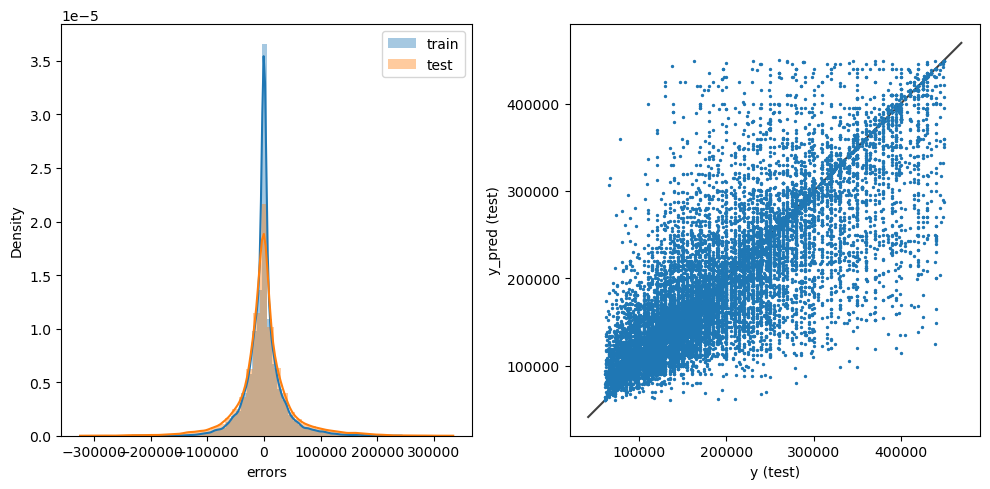

In [30]:
plot_errors(rmse_train_dtr, rmse_test_dtr, y_train_pred_dtr, y_test_pred_dtr)

#### Summary

In [31]:
summary = {
    'Model': ['Linear','KNN', 'Tree Decision'],
    'RMSE Train':[rmse_train_lin, rmse_train_knn, rmse_train_dtr],
    'RMSE test':[rmse_test_lin, rmse_test_knn,  rmse_test_dtr],
    'Mean RMSE':[np.mean([rmse_train_lin, rmse_test_lin]),
                            np.mean([rmse_train_knn, rmse_test_knn]),
                            np.mean([rmse_train_dtr, rmse_test_dtr])] 
            }

summary_df = pd.DataFrame(summary)
summary_df

,Model,RMSE Train,RMSE test,Mean RMSE
0,Linear,64127.651901,63838.516680,63983.084291
1,KNN,44368.028048,47629.817307,45998.922677
2,Tree Decision,32045.310232,48164.178912,40104.744572


I'll save these results to be comparable later in the next notebook, where we will implement new techniques to refine and evaluate the models.

In [37]:
import json
with open('results_p1.json','w') as file:
    json_object = json.dumps(summary, indent = 4)
    file.write(json_object)

That's it folks! There you have. These are the metrics we obtain for each model. Now we will continue our journey in [Project 2](Project02.ipynb) to make use of some feature engineer and hyperparameter tunning.

This is open source code, so you can use it, but remember to be etic and if is possibly, cite it.©